In [ ]:
from google.colab import files
uploaded = files.upload()  # Select your kaggle.json file when prompted


Saving kaggle.json to kaggle.json


In [ ]:
# Create the Kaggle configuration directory
!mkdir -p ~/.kaggle

# Copy the uploaded kaggle.json to the configuration directory
!cp kaggle.json ~/.kaggle/

# Set permissions so that only you can read the file
!chmod 600 ~/.kaggle/kaggle.json

# Verify that the file is in place
!ls -la ~/.kaggle/


total 16
drwxr-xr-x 2 root root 4096 Apr  3 22:12 .
drwx------ 1 root root 4096 Apr  3 22:12 ..
-rw------- 1 root root   74 Apr  3 22:12 kaggle.json


In [ ]:
# Step 3: Download and Unzip Datasets from Kaggle

# Download the Sentiment140 dataset from Kaggle
!kaggle datasets download -d kazanova/sentiment140

# Create a directory for the Sentiment140 dataset and unzip it
!mkdir -p /content/sentiment140
!unzip -o sentiment140.zip -d /content/sentiment140

# Download the US Comments Cleaned dataset (YouTube Comments) from Kaggle
!kaggle datasets download -d harshvardhan21/us-comments-cleaned-dataset-for-sentiment-analysis

# Create a directory for the YouTube Comments dataset and unzip it
!mkdir -p /content/youtube_comments
!unzip -o us-comments-cleaned-dataset-for-sentiment-analysis.zip -d /content/youtube_comments

# Verify that the files are in place
!ls -la /content/sentiment140
!ls -la /content/youtube_comments


Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
Archive:  sentiment140.zip
  inflating: /content/sentiment140/training.1600000.processed.noemoticon.csv  
Dataset URL: https://www.kaggle.com/datasets/harshvardhan21/us-comments-cleaned-dataset-for-sentiment-analysis
License(s): CC0-1.0
Archive:  us-comments-cleaned-dataset-for-sentiment-analysis.zip
  inflating: /content/youtube_comments/US_comments_Cleaned.csv  
total 233220
drwxr-xr-x 2 root root      4096 Apr  3 22:12 .
drwxr-xr-x 1 root root      4096 Apr  3 22:13 ..
-rw-r--r-- 1 root root 238803811 Sep 21  2019 training.1600000.processed.noemoticon.csv
total 74628
drwxr-xr-x 2 root root     4096 Apr  3 22:13 .
drwxr-xr-x 1 root root     4096 Apr  3 22:13 ..
-rw-r--r-- 1 root root 76406373 Feb  7  2024 US_comments_Cleaned.csv


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
127/127 - 8s - 62ms/step - accuracy: 0.5785 - loss: 0.6717 - val_accuracy: 0.7289 - val_loss: 0.5869
Epoch 2/5
127/127 - 1s - 4ms/step - accuracy: 0.7889 - loss: 0.4688 - val_accuracy: 0.7467 - val_loss: 0.5319
Epoch 3/5
127/127 - 1s - 5ms/step - accuracy: 0.9232 - loss: 0.2151 - val_accuracy: 0.7356 - val_loss: 0.6452
Epoch 4/5
127/127 - 1s - 5ms/step - accuracy: 0.9785 - loss: 0.0808 - val_accuracy: 0.7222 - val_loss: 0.8148
Epoch 5/5
127/127 - 0s - 4ms/step - accuracy: 0.9916 - loss: 0.0334 - val_accuracy: 0.7289 - val_loss: 0.9860
Test Accuracy: 0.6540
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.64      0.64       244
           1       0.66      0.67      0.67       256

    accuracy                           0.65       500
   macro avg       0.65      0.65      0.65       500
weighted avg       0.65      0.65      0.65       500



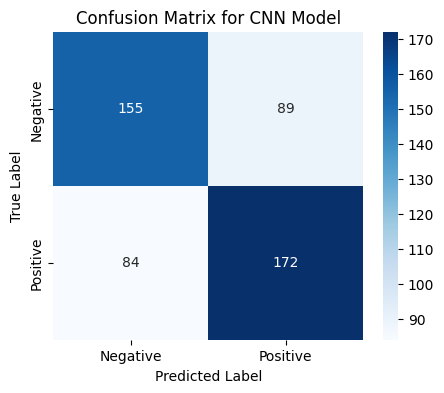

In [ ]:
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Sentiment140 dataset (if not already loaded)
sentiment140_path = "/content/sentiment140/training.1600000.processed.noemoticon.csv"
df = pd.read_csv(sentiment140_path, encoding="latin-1", header=None)
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']

# Step 2: Define a simple text cleaning function
def clean_text(text):
    text = re.sub(r'http\S+|www.\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+|#\w+', '', text)         # Remove mentions and hashtags
    return text.lower().strip()

df['clean_text'] = df['text'].apply(clean_text)

# Step 3: Sample a small subset for fast training (e.g., 5000 samples)
sample_df = df.sample(n=5000, random_state=42).copy()

# Convert labels: 0 remains 0 (negative), 4 becomes 1 (positive)
sample_df['target'] = sample_df['target'].apply(lambda x: 0 if x == 0 else 1)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    sample_df['clean_text'], sample_df['target'], test_size=0.1, random_state=42
)

# Step 5: Tokenize the text using Keras Tokenizer
max_features = 10000  # Maximum number of words to consider
max_length = 100      # Maximum sequence length

tokenizer = Tokenizer(num_words=max_features, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Step 6: Build a CNN model for text classification
embedding_dim = 100

model = Sequential([
    Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=max_length),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Step 7: Train the CNN model
epochs = 5  # For quick training on a small sample
history = model.fit(
    X_train_pad, y_train,
    epochs=epochs,
    batch_size=32,
    validation_split=0.1,
    verbose=2
)

# Step 8: Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for CNN Model")
plt.show()


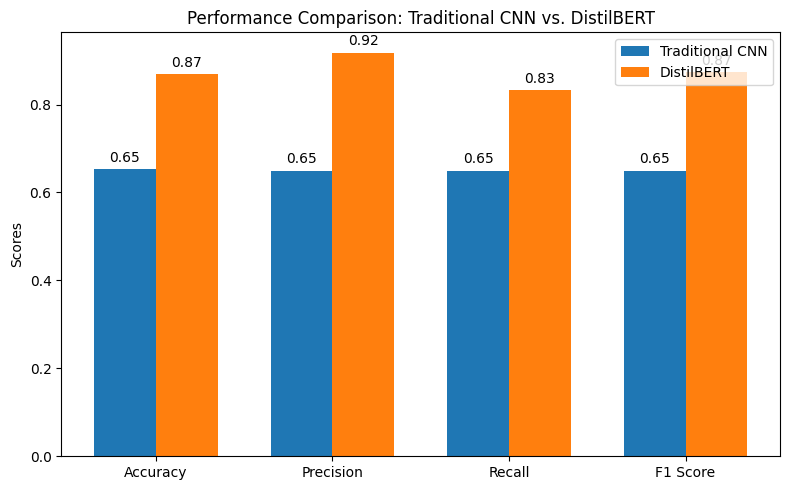

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define evaluation metrics for both models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
cnn_metrics = [0.6540, 0.65, 0.65, 0.65]      # Traditional CNN results
bert_metrics = [0.87, 0.9184, 0.8333, 0.8738]   # DistilBERT results

x = np.arange(len(metrics))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, cnn_metrics, width, label='Traditional CNN')
rects2 = ax.bar(x + width/2, bert_metrics, width, label='DistilBERT')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison: Traditional CNN vs. DistilBERT')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Function to add labels on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()
